In [1]:
import numpy as np
import rrcf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Create data

In [2]:
np.random.seed(0)

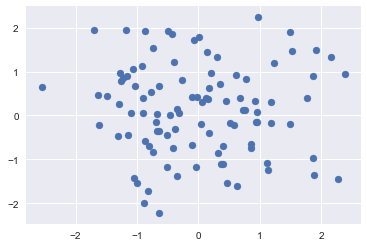

In [3]:
# Get random data 
X = np.random.randn(100,2)
plt.scatter(X[:,0], X[:,1])

In [4]:
tree = rrcf.RCTree(X)

In [5]:
tree._count_leaves(tree.root)

100

# Create new inlier point

In [6]:
inlier = np.random.randn(2)

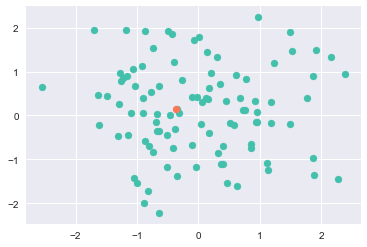

In [7]:
# plot the updated data set
plt.scatter(X[:,0], X[:,1], c="#43c0ac")
plt.scatter(inlier[0], inlier[1], c="#ff7657")

In [8]:
nearest_neighbor = tree.query(inlier)
print(inlier)
print(nearest_neighbor.x)

[-0.36469354  0.15670386]
[-0.34791215  0.15634897]


In [9]:
new_leaf = tree.insert_point(inlier, index=100)

In [10]:
tree._count_leaves(tree.root)

101

In [11]:
new_leaf.u.l is new_leaf

True

In [12]:
new_leaf.u.r is nearest_neighbor

True

In [13]:
new_leaf.d

9

# Create forest

In [14]:
forest = []
num_trees = 100

for _ in range(num_trees):
    tree = rrcf.RCTree(X)
    forest.append(tree)

# Create new outlier point

In [15]:
outlier = np.array([4, 4])

In [16]:
points = np.asarray([leaf.x for leaf in tree.leaves.values()])

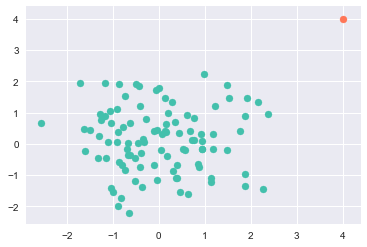

In [17]:
# plot the updated data set
plt.scatter(points[:,0], points[:,1], c="#43c0ac")
plt.scatter(outlier[0], outlier[1], c="#ff7657")

# Insert inlier and outlier into each tree in the forest

In [18]:
for tree in forest:
    tree.insert_point(inlier, index='inlier')

In [19]:
for tree in forest:
    tree.insert_point(outlier, index='outlier')

# Compute CoDisp for inlier and outlier

In [20]:
# Codisp for inlier
np.asarray([tree.codisp('inlier') for tree in forest]).mean()

2.1272307569305853

In [21]:
# Codisp for outlier 
np.asarray([tree.codisp('outlier') for tree in forest]).mean()

44.877438789280895